## Income Data Analysis

**Importing the Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

**Uploading the dataset**

In [2]:
incom_df = pd.read_excel("DS1_C5_S1_Income_Data_Challenge.xlsx")

In [40]:
incom_df

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40.000000,United-States,<=50K
1,50.0,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,36.126352,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40.000000,United-States,<=50K
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40.000000,United-States,<=50K
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40.000000,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38.000000,United-States,<=50K
32557,40.0,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40.000000,United-States,>50K
32558,58.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40.000000,United-States,<=50K
32559,22.0,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,39.013107,United-States,<=50K


**Task1**

In [4]:
incom_df.shape

(32561, 11)

In [5]:
incom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [6]:
incom_df.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

**No Missing Values** were found

**Task2**

In [47]:
def data_types(df):
    cat_var=[]
    con_var=[]
    
    
    for col in df:
        if df[col].nunique()<35:
            cat_var.append(col)
        else:
            con_var.append(col)
    return cat_var,con_var   

In [48]:
categorical_var,continous_var = data_types(incom_df)
print(tabulate({"cat_var":categorical_var,"con_var":continous_var},headers=["Categorical Var", "Continous Var"]))

Categorical Var    Continous Var
-----------------  ---------------
WorkClass          Age
Education          Hours_Per_Week
Education_Num      Native_Country
Marital_Status
Occupation
Relationship
Gender
Income_Bracket


A table have been created with categorical and continous values.

**Task3**

In [45]:
def cat_info(col):
    print(f"Unique values in {col} : {incom_df[col].unique()}")
    print(f"Missing Value counts of {col}: {incom_df[col].isnull().sum()}")
    print(f"Mode of {col}: {incom_df[col].mode()[0]}")
    value_counts=incom_df[col].value_counts()
    print("value counts:", value_counts)

In [46]:
def cat_visual(col):
    value_counts= incom_df[col].value_counts()
    per= incom_df[col].value_counts(normalize=True)*100 #value_counts in percentage
    plt.figure(figsize=(8,6))
    plt.bar(value_counts.index,value_counts.values)
    plt.title(f"value count of{col}")
        
    
    plt.figure(figsize=(8,6))
    plt.pie(per.values,labels=per.index,autopct="%1.1f%%")
    plt.title(f"percentage of {col}")

Two functions have been created for the categorical Values to do the descriptive analysis.

**Task4**

1.Education

In [11]:
cat_info('Education')

Unique values in Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Missing Value counts of Education: 0
Mode of Education:  HS-grad
value counts:  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


No missing values have been found in the Education column.

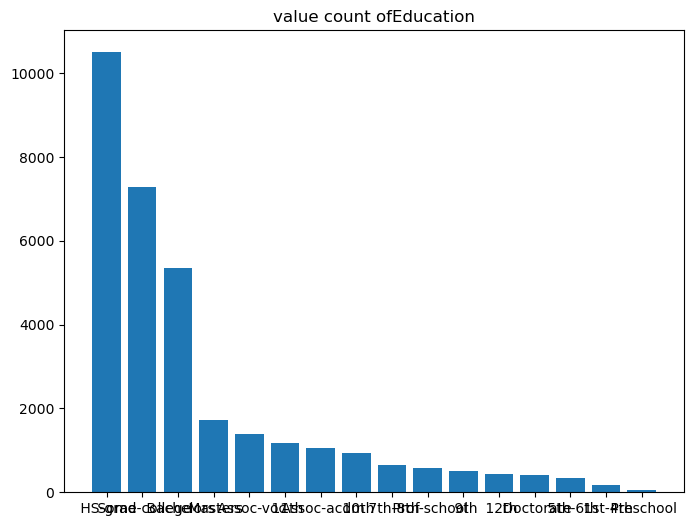

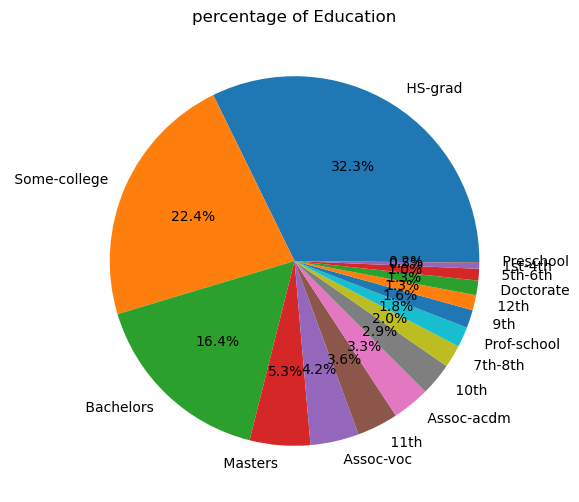

In [12]:
cat_visual('Education')

From the above analysis we can see that most of the people who have their education in **Highschool graduate** have more income than others.

2.Marital_Status

In [13]:
cat_info('Marital_Status')

Unique values in Marital_Status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Missing Value counts of Marital_Status: 0
Mode of Marital_Status:  Married-civ-spouse
value counts:  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64


No null values have been found.

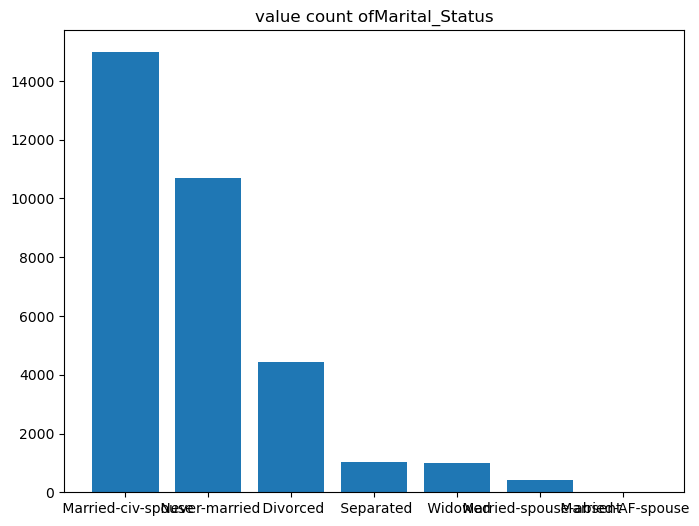

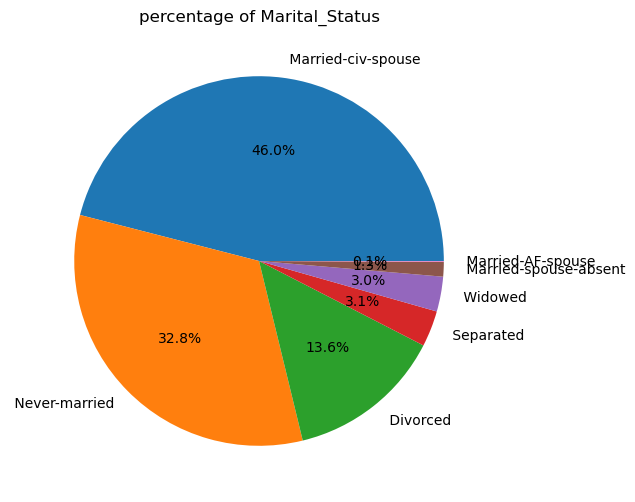

In [14]:
cat_visual('Marital_Status')

**46%** who belong to the **Married-civilian-spouse** have more income.

3.Gender

In [15]:
cat_info("Gender")

Unique values in Gender : [' Male' ' Female']
Missing Value counts of Gender: 0
Mode of Gender:  Male
value counts:  Male      21790
 Female    10771
Name: Gender, dtype: int64


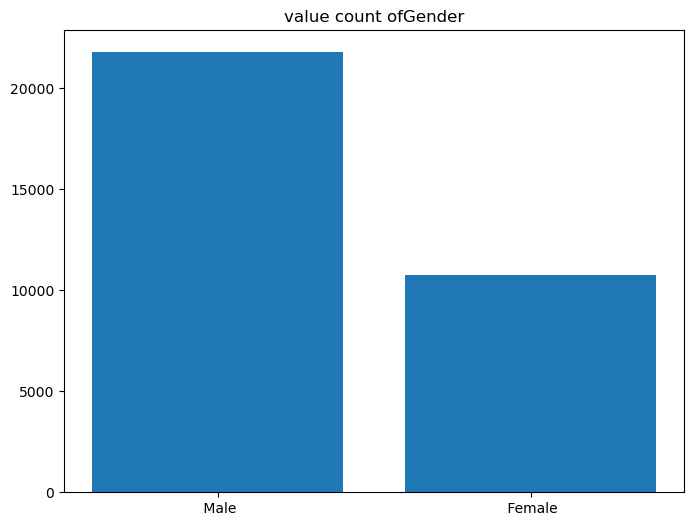

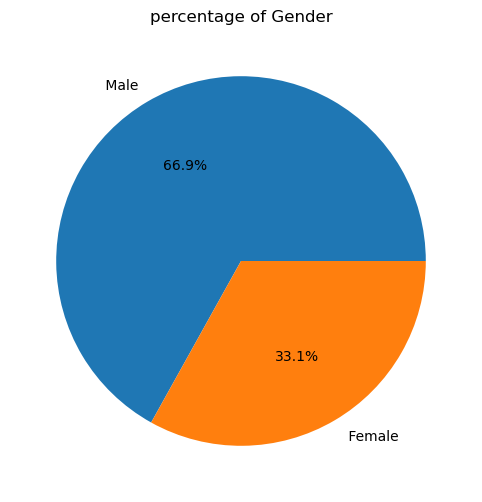

In [16]:
cat_visual('Gender')

From the Analysis we found that more than half of the **Males** have high income than females.

4.Income_Bracket

In [17]:
cat_info('Income_Bracket')

Unique values in Income_Bracket : [' <=50K' ' >50K']
Missing Value counts of Income_Bracket: 0
Mode of Income_Bracket:  <=50K
value counts:  <=50K    24720
 >50K      7841
Name: Income_Bracket, dtype: int64


No missing values have been found

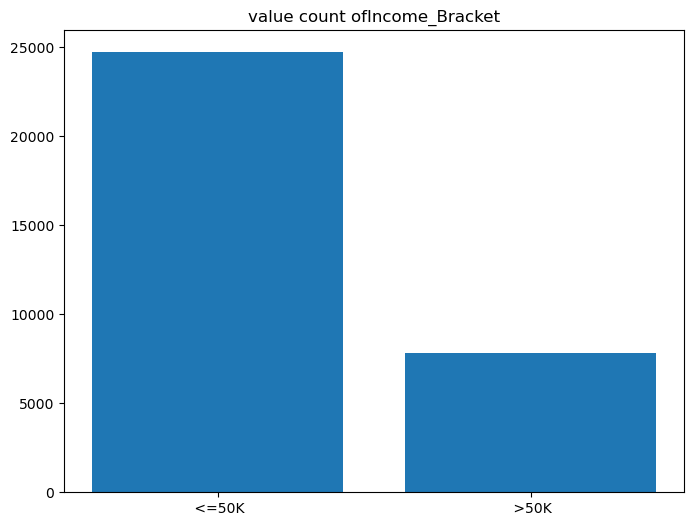

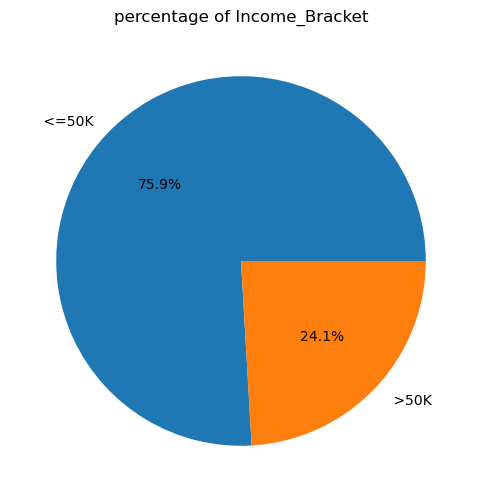

In [18]:
cat_visual('Income_Bracket')

From the above analysis we found that people earning **less than or equal** to 50K have high income.

5.WorkClass

In [19]:
cat_info('WorkClass')

Unique values in WorkClass : [' State-gov' 'Self-emp' ' Private' ' Federal-gov' ' Local-gov' ' ?'
 ' Self-emp' ' Without-pay' ' Never-worked']
Missing Value counts of WorkClass: 0
Mode of WorkClass:  Private
value counts:  Private         22696
Self-emp          2541
 Local-gov        2093
 ?                1836
 State-gov        1298
 Self-emp         1116
 Federal-gov       960
 Without-pay        14
 Never-worked        7
Name: WorkClass, dtype: int64


No missing values have been found

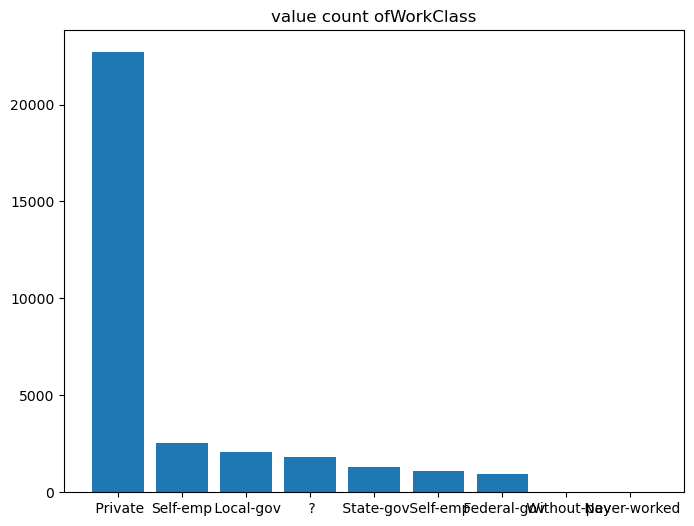

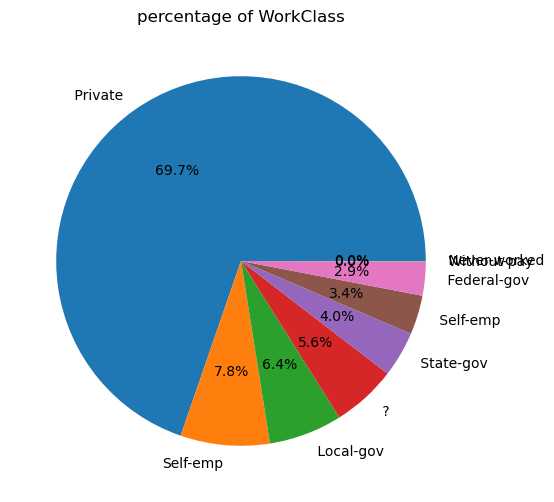

In [20]:
cat_visual('WorkClass')

From the above analysis we found the most of the people doing **Private** job have high income.

**Task5**

In [36]:
def con_info(col):
    summary=incom_df[col].describe()
    print(summary)
    print(f"median of {col}: {incom_df[col].median()}")
    print(f"missing values {col}: {incom_df[col].isnull().sum()}")
    print(f"skewness of {col}:{incom_df[col].skew()}")
   

In [37]:
def con_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(10,10))
    ax[0].hist(incom_df[col])
    sns.boxplot(y=incom_df[col],ax=ax[1])

Created two fuctions one for getting the central tendencies along with the skewness and ohter for visualization in box and histogram.

**Task6**

1.Age

In [23]:
con_info('Age')

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64
median of Age: 37.0
missing values Age: 0
skewness of Age:0.5587433694130484


No missing values found

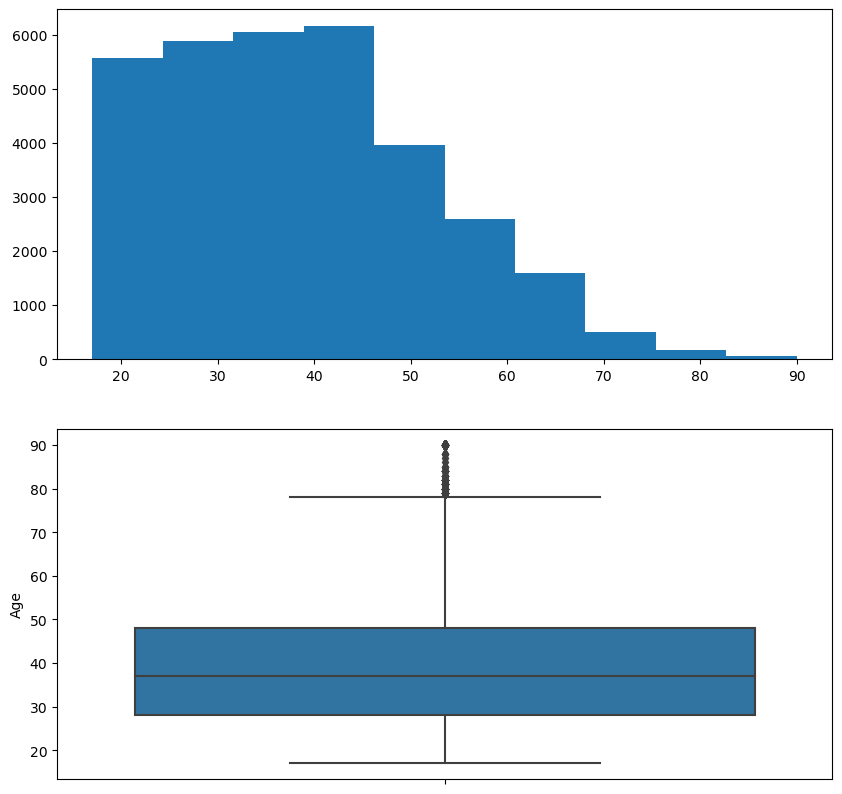

In [24]:
con_visual('Age')

**Outliers Detected**

In [25]:
ag_75=incom_df[incom_df["Age"]>=75].index
for i in ag_75:
    incom_df.loc[i,"Age"]=incom_df["Age"].mean()

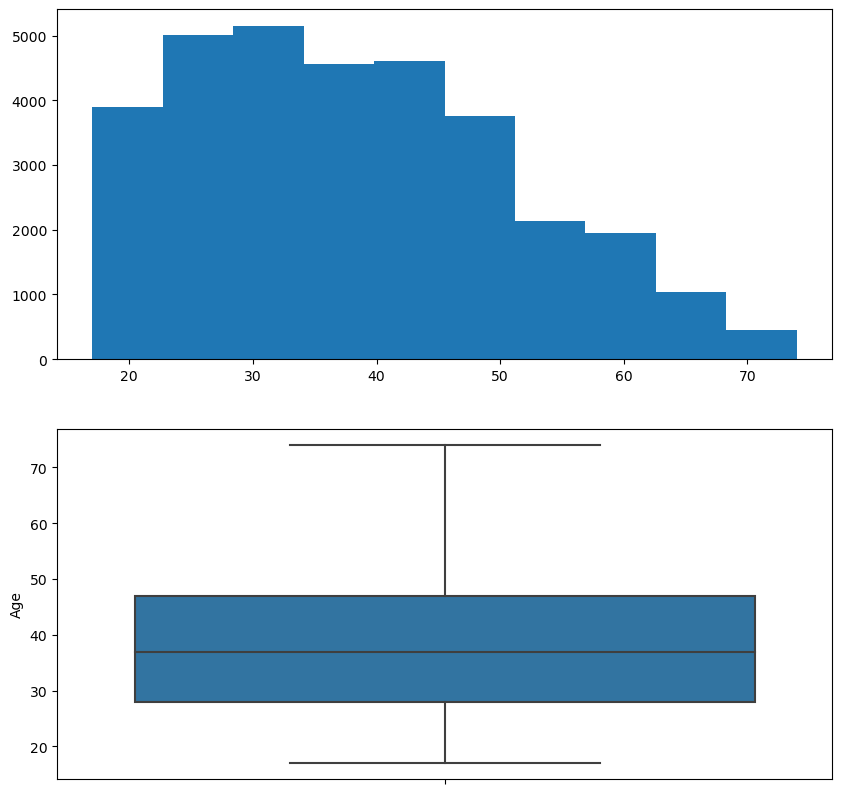

In [26]:
con_visual('Age')

**No outliers Detected**

In [27]:
con_info('Age')

count    32561.000000
mean        38.215637
std         13.060947
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         74.000000
Name: Age, dtype: float64
median of Age: 37.0
missing values Age: 0
skewness of Age:0.42621911578271643


<AxesSubplot:ylabel='Age'>

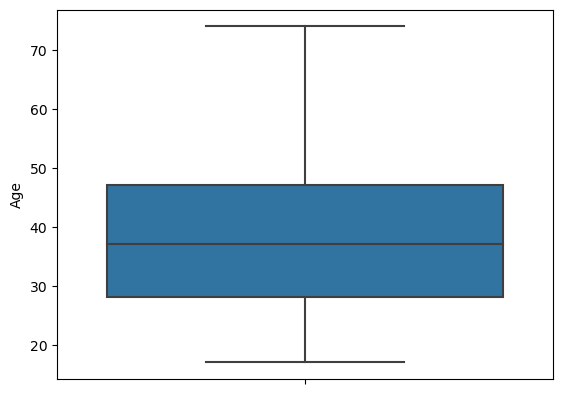

In [28]:
sns.boxplot(y=incom_df['Age'])

The above column **Age**  has been cleaned and the detected outliers have been cleared by the calculated mean.
The skewness have been decreased .

2.Hours_Per_Week

In [29]:
con_info('Hours_Per_Week')

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours_Per_Week, dtype: float64
median of Hours_Per_Week: 40.0
missing values Hours_Per_Week: 0
skewness of Hours_Per_Week:0.22764253680450092


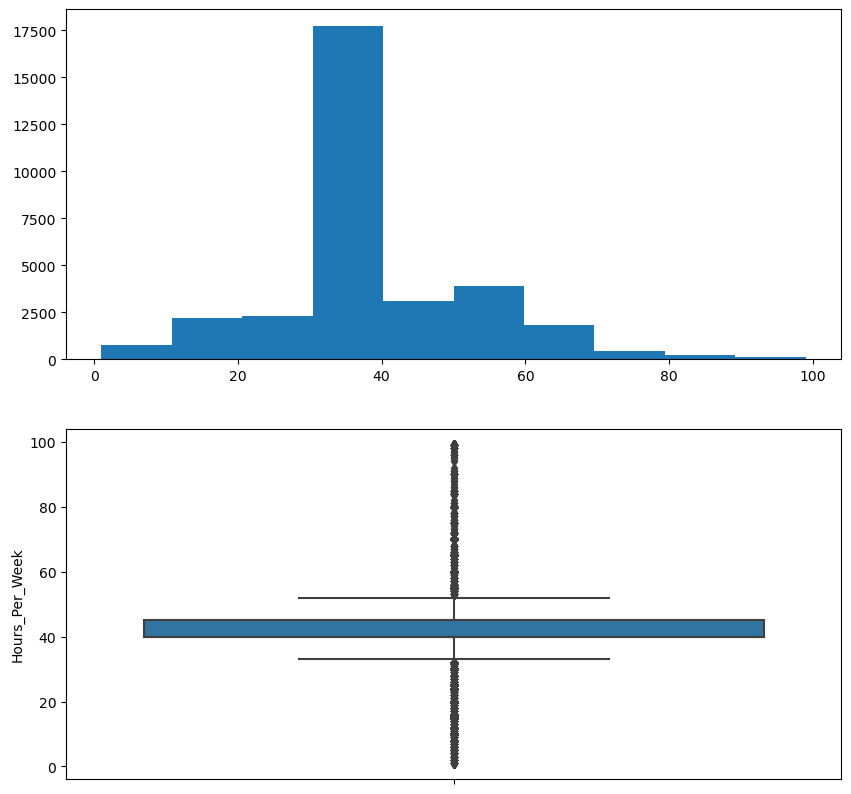

In [30]:
con_visual('Hours_Per_Week')

**Outliers Detected**

In [31]:
hr_55=incom_df[incom_df["Hours_Per_Week"]>=45].index
for i in hr_55:
    incom_df.loc[i,"Hours_Per_Week"]=incom_df["Hours_Per_Week"].mean()

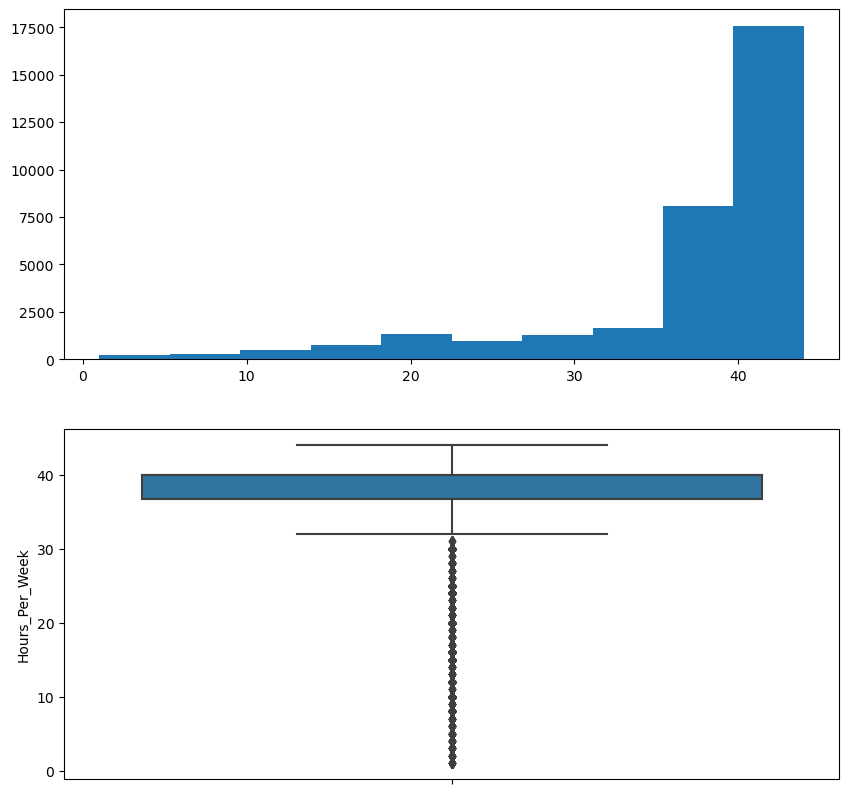

In [32]:
con_visual('Hours_Per_Week')

In [33]:
hr_30=incom_df[incom_df["Hours_Per_Week"]<=35].index
for i in hr_30:
    incom_df.loc[i,"Hours_Per_Week"]=incom_df["Hours_Per_Week"].mean()

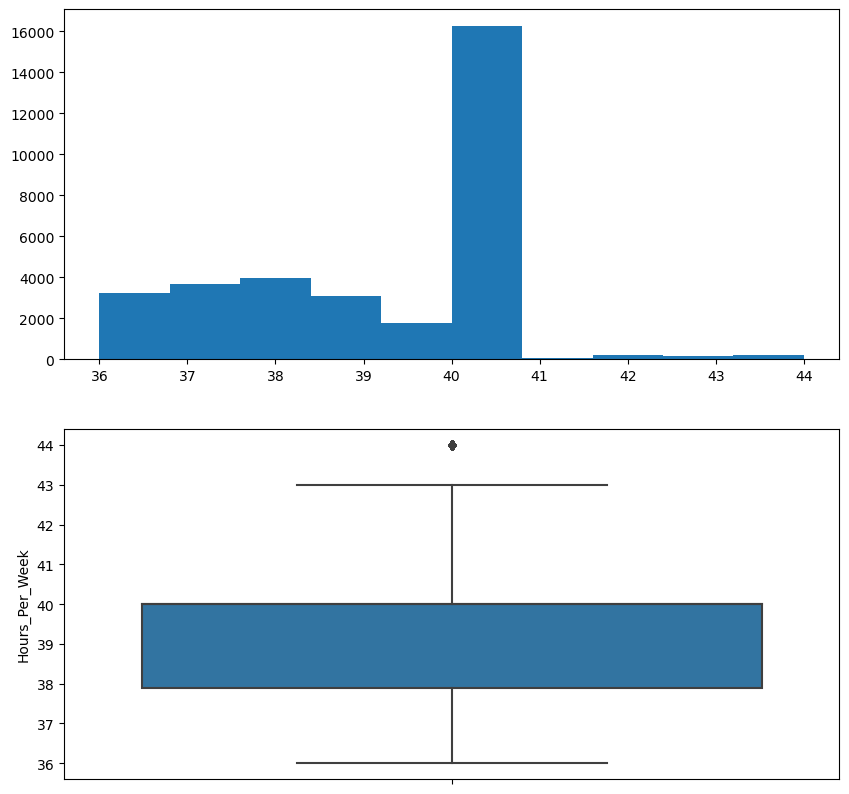

In [34]:
con_visual('Hours_Per_Week')

The outliers have been cleared.

3.Education_Num

In [49]:
con_info('Education_Num')

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Education_Num, dtype: float64
median of Education_Num: 10.0
missing values Education_Num: 0
skewness of Education_Num:-0.3116758679102297


No missing values

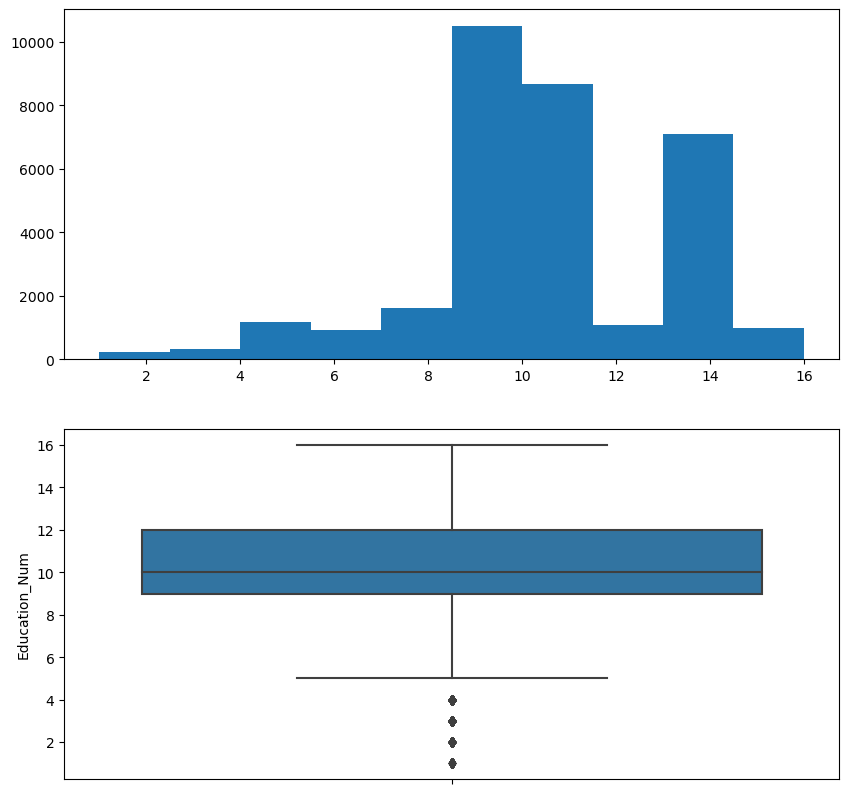

In [50]:
con_visual('Education_Num')

Outliers Detected

In [51]:
ed_5=incom_df[incom_df["Education_Num"]<=5].index
for i in ed_5:
    incom_df.loc[i,"Education_Num"]=incom_df["Education_Num"].mean()

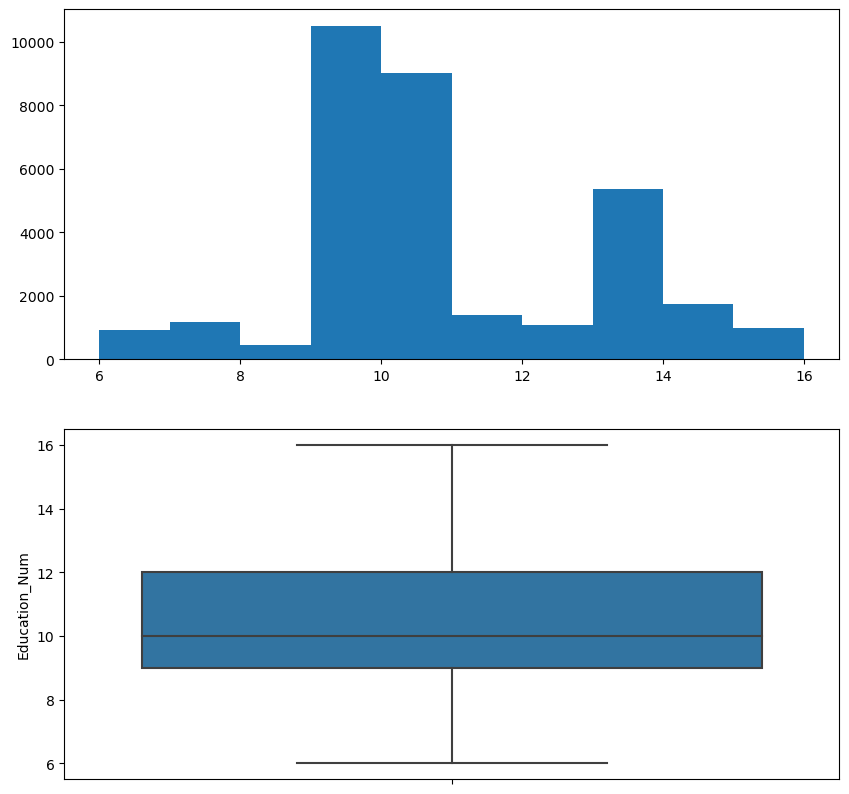

In [52]:
con_visual('Education_Num')

Outliers Cleared

<AxesSubplot:ylabel='Education_Num'>

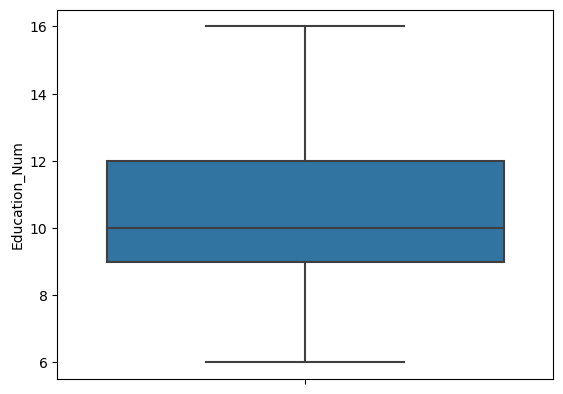

In [53]:
sns.boxplot(y=incom_df['Education_Num'])

In [54]:
con_info('Education_Num')

count    32561.000000
mean        10.418631
std          2.094452
min          6.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Education_Num, dtype: float64
median of Education_Num: 10.0
missing values Education_Num: 0
skewness of Education_Num:0.4641655008700982


The outliers have been cleared with less skewness.

**Conclusion:** The analysis shows that people with **HighSchool graduation** , married with a **civilian** and are **Males** , working in **Private** Sector and who earn **less than or equal to 50k** have more Income as compared to others.